In [2]:
import pandas as pd
data = pd.read_csv("data/Wine_Quality_Data.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
x = data.drop("color",axis=1)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_tarin,y_test = train_test_split(x,data.color)
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3245,6.4,0.22,0.49,7.5,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6
752,7.6,0.54,0.13,2.5,0.097,24.0,66.0,0.99785,3.39,0.61,9.4,5
5723,6.0,0.13,0.36,1.6,0.052,23.0,72.0,0.98974,3.10,0.50,11.5,7
91,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
4370,6.3,0.20,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
3434,8.0,0.55,0.42,12.6,0.211,37.0,213.0,0.99880,2.99,0.56,9.3,5
1508,7.1,0.27,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6
3882,7.4,0.33,0.26,15.6,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,5


In [25]:
y_test

2038    white
2604    white
5889    white
6183    white
2100    white
        ...  
6463    white
4339    white
5030    white
629       red
2946    white
Name: color, Length: 1625, dtype: object

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(x_train)
km.predict(x_test)

array([0, 0, 1, ..., 1, 0, 1])

In [10]:
km.inertia_

6350066.532966004

In [28]:
results = pd.DataFrame()

results['y_test'] = y_test
results['cluster'] = km.predict(x_test)

In [29]:
results

,y_test,cluster
2038,white,3
2604,white,3
5889,white,3
6183,white,3
2100,white,0
...,...,...
6463,white,0
4339,white,0
5030,white,0
629,red,3


In [14]:
results.groupby(["y_test","cluster"]).cluster.count()

y_test  cluster
red     0          365
        1           20
white   0          325
        1          915
Name: cluster, dtype: int64

In [15]:
d = {}
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(x_train)
    d[k] = km.inertia_
d
    
    

{2: 6350066.532966004,
 3: 3171280.309573664,
 4: 2228882.449571887,
 5: 1749821.1377464924,
 6: 1498912.0216058698,
 7: 1303499.8019480177,
 8: 1166965.3024702312,
 9: 1065351.301419352}

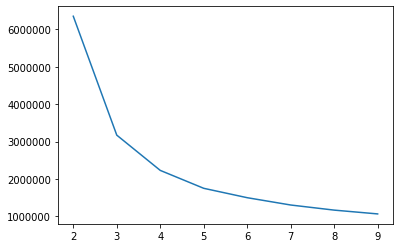

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(d.keys()),list(d.values()))

In [19]:
km = KMeans(n_clusters=4)
km.fit(x_train)
pred = km.predict(x_train)

In [20]:
train_copy = x_train.copy()
train_copy['cluster'] =pred

In [21]:
train_copy

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,cluster
3245,6.4,0.22,0.49,7.5,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6,0
752,7.6,0.54,0.13,2.5,0.097,24.0,66.0,0.99785,3.39,0.61,9.4,5,1
5723,6.0,0.13,0.36,1.6,0.052,23.0,72.0,0.98974,3.10,0.50,11.5,7,3
91,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6,0
4370,6.3,0.20,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,1
3434,8.0,0.55,0.42,12.6,0.211,37.0,213.0,0.99880,2.99,0.56,9.3,5,2
1508,7.1,0.27,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6,1
3882,7.4,0.33,0.26,15.6,0.049,67.0,210.0,0.99907,3.06,0.68,9.5,5,2


In [22]:
train_copy[train_copy['cluster'] ==0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,cluster
3245,6.4,0.22,0.49,7.5,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6,0
91,8.6,0.49,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6,0
4370,6.3,0.20,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,0
3855,7.1,0.14,0.35,1.4,0.039,24.0,128.0,0.99212,2.97,0.68,10.4,5,0
1915,6.8,0.25,0.34,4.7,0.031,34.0,134.0,0.99270,3.21,0.38,10.6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3836,6.4,0.34,0.20,14.9,0.060,37.0,162.0,0.99830,3.13,0.45,9.0,4,0
3709,6.5,0.22,0.25,17.1,0.050,44.0,138.0,1.00010,3.30,0.37,8.8,5,0
3104,9.2,0.18,0.49,1.5,0.041,39.0,130.0,0.99450,3.04,0.49,9.8,7,0
2987,7.3,0.18,0.29,1.2,0.044,12.0,143.0,0.99180,3.20,0.48,11.3,7,0


In [23]:
train_copy['cluster'].value_counts()

3    1561
0    1409
1    1080
2     822
Name: cluster, dtype: int64

In [24]:
train_copy['cluster'].value_counts(normalize=True)

3    0.320402
0    0.289204
1    0.221675
2    0.168719
Name: cluster, dtype: float64